# ▶**Importar bibliotecas necesarias.**

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from tabulate import tabulate

# ✅ **Dataframe de los datos recogidos de la herramienta CrystalDiskMark.**

In [ ]:
# Crear DataFrame con datos
columns = ['Configuration', 'Read Speed (MB/s)', 'Write Speed (MB/s)']
data = [
    ['Disk Normal', 432.90, 30.56],
    ['Disk Normal', 20.59, 29.49],
    ['Disk Normal', 5026.86, 7198.73],
    ['Disk Normal', 197.78, 138.12],
    ['RAID 1', 36.26, 27.65],
    ['RAID 1', 0.47, 0.61],
    ['RAID 1', 114.26, 150.15],
    ['RAID 1', 8708.28, 6649.22]
]

In [ ]:
df = pd.DataFrame(data, columns=columns)

In [ ]:
# Mostrar un resumen de los datos
print("Datos iniciales:")
print(df.head(8))

Datos iniciales:
  Configuration  Read Speed (MB/s)  Write Speed (MB/s)
0   Disk Normal             432.90               30.56
1   Disk Normal              20.59               29.49
2   Disk Normal            5026.86             7198.73
3   Disk Normal             197.78              138.12
4        RAID 1              36.26               27.65
5        RAID 1               0.47                0.61
6        RAID 1             114.26              150.15
7        RAID 1            8708.28             6649.22


# 📊 **Estadisticas.**

In [ ]:
# Estadísticas descriptivas
stats = df.groupby('Configuration').describe()

# Imprimir estadísticas descriptivas en formato tabular
print("\nEstadísticas descriptivas por configuración:\n")
print(tabulate(stats, headers="keys", tablefmt="grid", floatfmt=".2f"))


Estadísticas descriptivas por configuración:

+-----------------+----------------------------------+---------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+--------------------------------+-----------------------------------+----------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+---------------------------------+
| Configuration   |   ('Read Speed (MB/s)', 'count') |   ('Read Speed (MB/s)', 'mean') |   ('Read Speed (MB/s)', 'std') |   ('Read Speed (MB/s)', 'min') |   ('Read Speed (MB/s)', '25%') |   ('Read Speed (MB/s)', '50%') |   ('Read Speed (MB/s)', '75%') |   ('Read Speed (MB/s)', 'max') |   ('Write Speed (MB/s)', 'count') |   ('Write Speed (MB/s)', 'mean') |   ('Write Speed (MB/s)', 'std') |

<ipython-input-39-bcf9f707f9c4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Configuration', y='Read Speed (MB/s)', data=df, ax=axes[0, 0], palette="Set2")
<ipython-input-39-bcf9f707f9c4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Configuration', y='Write Speed (MB/s)', data=df, ax=axes[0, 1], palette="Set3")


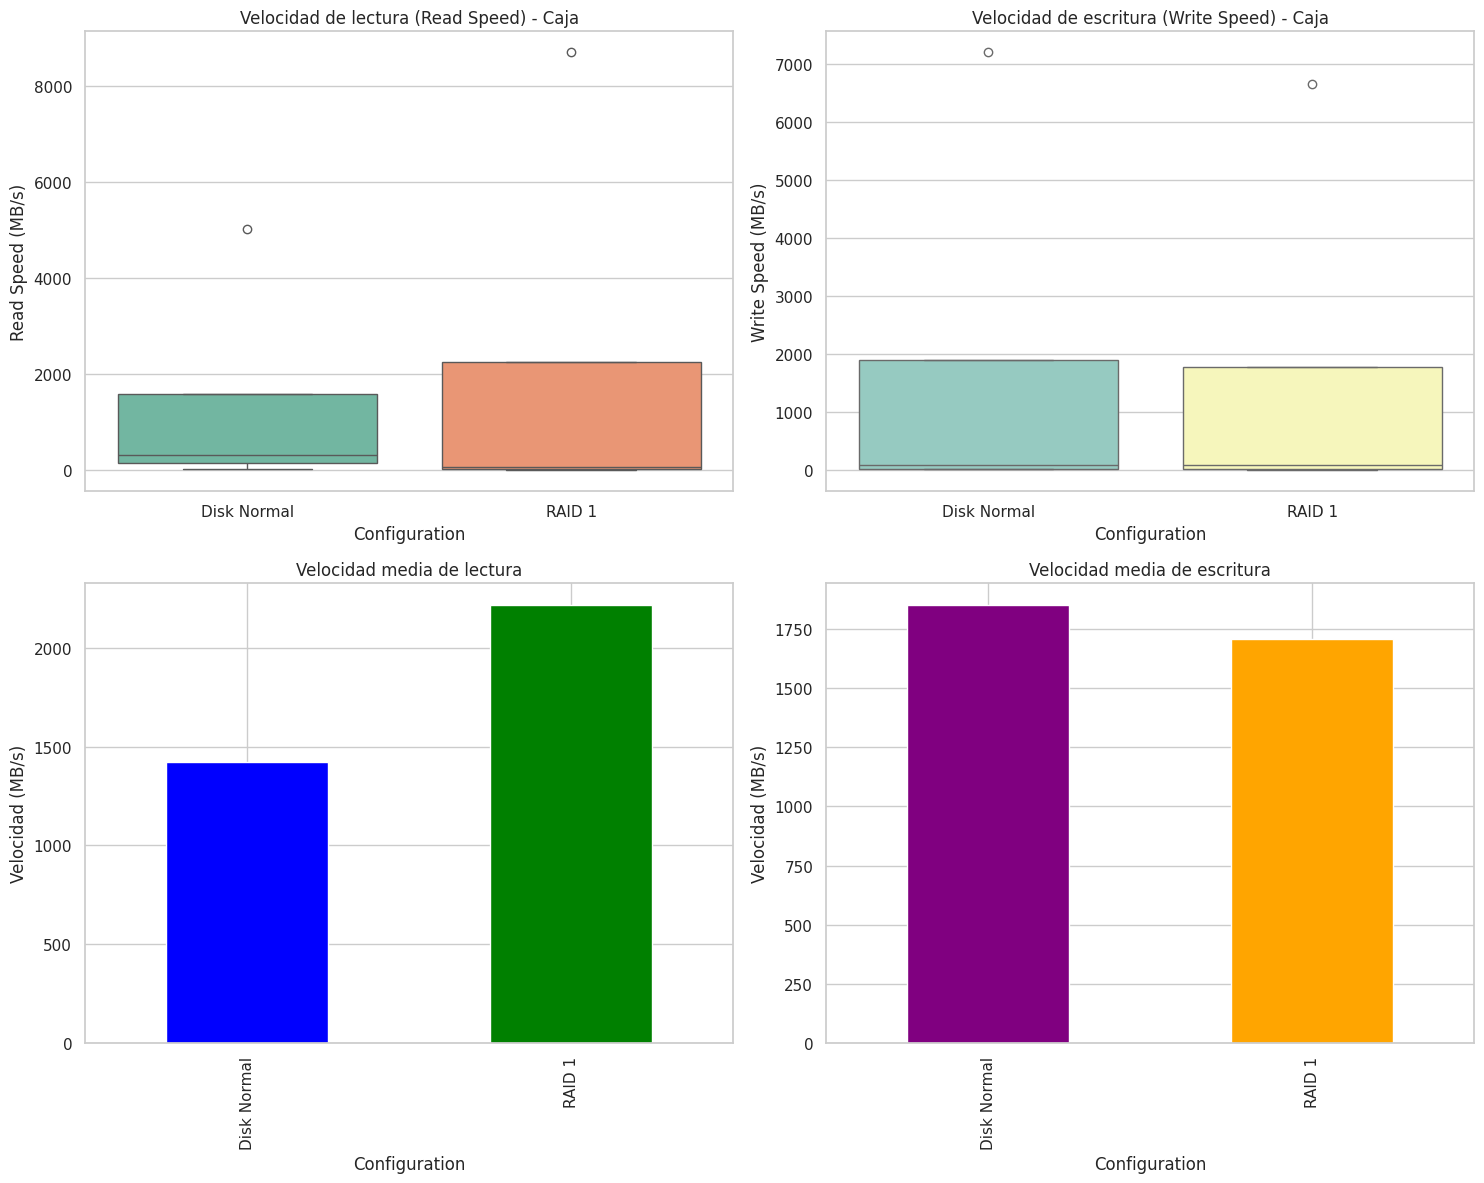

In [ ]:
# Configuración de estilo para gráficos
sns.set(style="whitegrid")

# Gráficos de caja para comparar velocidades de lectura y escritura
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.boxplot(x='Configuration', y='Read Speed (MB/s)', data=df, ax=axes[0, 0], palette="Set2")
axes[0, 0].set_title('Velocidad de lectura (Read Speed) - Caja')
sns.boxplot(x='Configuration', y='Write Speed (MB/s)', data=df, ax=axes[0, 1], palette="Set3")
axes[0, 1].set_title('Velocidad de escritura (Write Speed) - Caja')

# Gráficos de barras con medias
read_means = df.groupby('Configuration')['Read Speed (MB/s)'].mean()
write_means = df.groupby('Configuration')['Write Speed (MB/s)'].mean()
read_means.plot(kind='bar', ax=axes[1, 0], color=['blue', 'green'], title='Velocidad media de lectura')
axes[1, 0].set_ylabel('Velocidad (MB/s)')
write_means.plot(kind='bar', ax=axes[1, 1], color=['purple', 'orange'], title='Velocidad media de escritura')
axes[1, 1].set_ylabel('Velocidad (MB/s)')

plt.tight_layout()
plt.show()

<ipython-input-41-33fc9b1dc165>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Configuration", y="Read Speed (MB/s)", palette="Set2", ax=axes[0])
<ipython-input-41-33fc9b1dc165>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Configuration", y="Write Speed (MB/s)", palette="Set3", ax=axes[1])


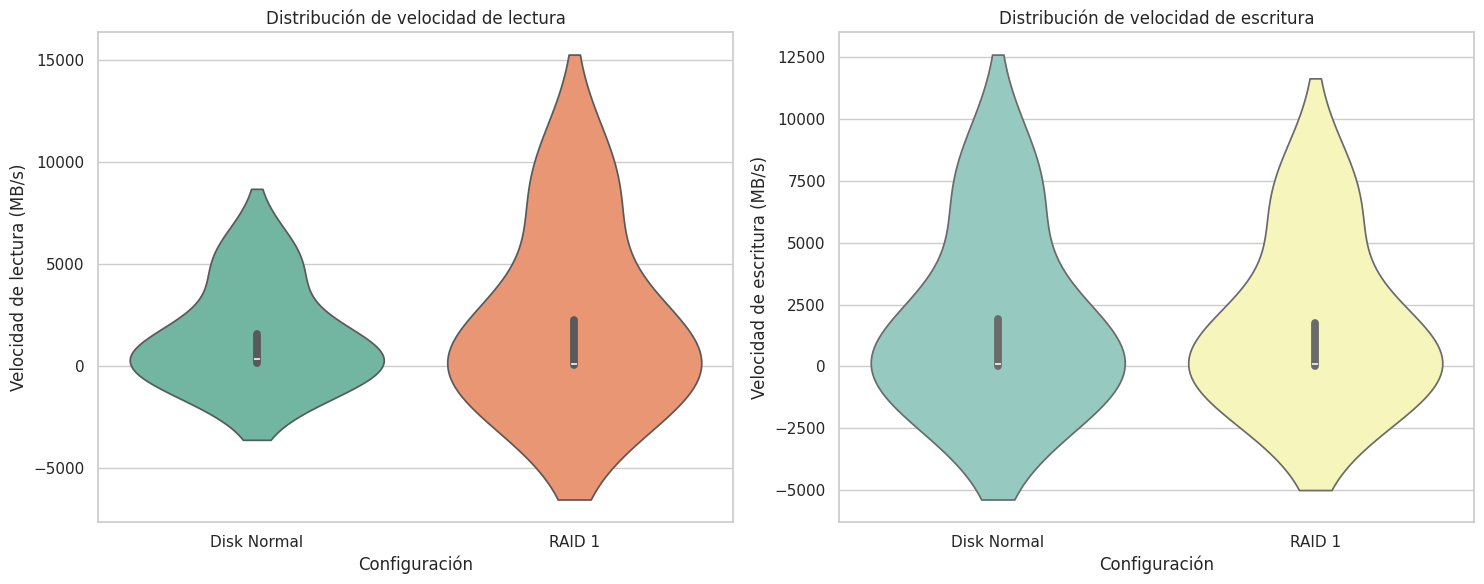

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Velocidad de lectura
sns.violinplot(data=df, x="Configuration", y="Read Speed (MB/s)", palette="Set2", ax=axes[0])
axes[0].set_title("Distribución de velocidad de lectura")
axes[0].set_ylabel("Velocidad de lectura (MB/s)")
axes[0].set_xlabel("Configuración")

# Velocidad de escritura
sns.violinplot(data=df, x="Configuration", y="Write Speed (MB/s)", palette="Set3", ax=axes[1])
axes[1].set_title("Distribución de velocidad de escritura")
axes[1].set_ylabel("Velocidad de escritura (MB/s)")
axes[1].set_xlabel("Configuración")

plt.tight_layout()
plt.show()

In [ ]:
# Prueba t para comparar las medias
read_normal = df[df['Configuration'] == 'Disk Normal']['Read Speed (MB/s)']
read_raid = df[df['Configuration'] == 'RAID 1']['Read Speed (MB/s)']
write_normal = df[df['Configuration'] == 'Disk Normal']['Write Speed (MB/s)']
write_raid = df[df['Configuration'] == 'RAID 1']['Write Speed (MB/s)']

t_stat_read, p_value_read = ttest_ind(read_normal, read_raid)
t_stat_write, p_value_write = ttest_ind(write_normal, write_raid)

print("\nPruebas T:")
print(f"Read Speed: t-statistic = {t_stat_read:.2f}, p-value = {p_value_read:.4f}")
print(f"Write Speed: t-statistic = {t_stat_write:.2f}, p-value = {p_value_write:.4f}")



Pruebas T:
Read Speed: t-statistic = -0.32, p-value = 0.7591
Write Speed: t-statistic = 0.06, p-value = 0.9552


In [ ]:
# Interpretación de resultados
alpha = 0.05
print("\nInterpretación de los resultados:")
if p_value_read < alpha:
    print("Hay una diferencia estadísticamente significativa en las velocidades de lectura.")
else:
    print("No hay una diferencia estadísticamente significativa en las velocidades de lectura.")

if p_value_write < alpha:
    print("Hay una diferencia estadísticamente significativa en las velocidades de escritura.")
else:
    print("No hay una diferencia estadísticamente significativa en las velocidades de escritura.")



Interpretación de los resultados:
No hay una diferencia estadísticamente significativa en las velocidades de lectura.
No hay una diferencia estadísticamente significativa en las velocidades de escritura.
